In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
rows, cols = img.shape


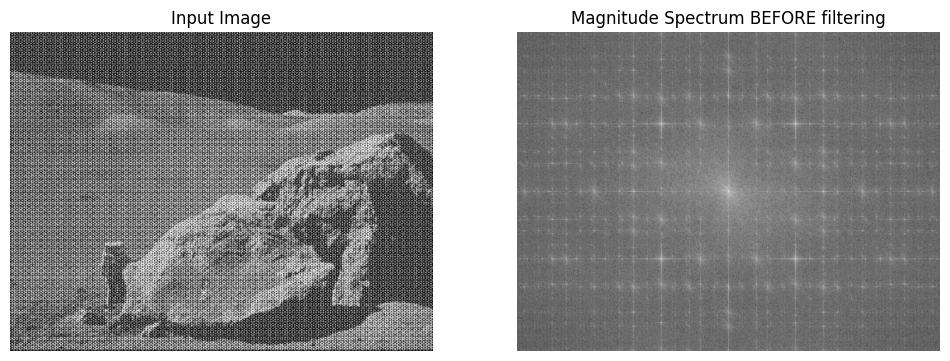

In [2]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

mag_before = 20 * np.log(
    cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1
)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(mag_before, cmap='gray')
plt.title('Magnitude Spectrum BEFORE filtering')
plt.axis('off')
plt.show()


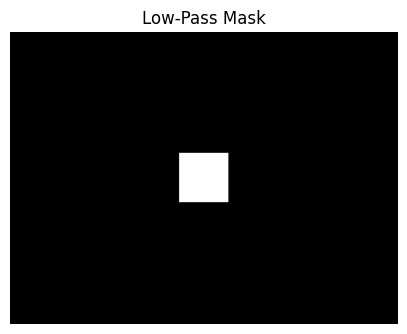

In [3]:
mask = np.zeros((rows, cols, 2), np.uint8)
cx, cy = rows // 2, cols // 2
mask[cx-50:cx+50, cy-50:cy+50, :] = 1

plt.figure(figsize=(5,5))
plt.imshow(mask[:,:,0], cmap='gray')
plt.title('Low-Pass Mask')
plt.axis('off')
plt.show()


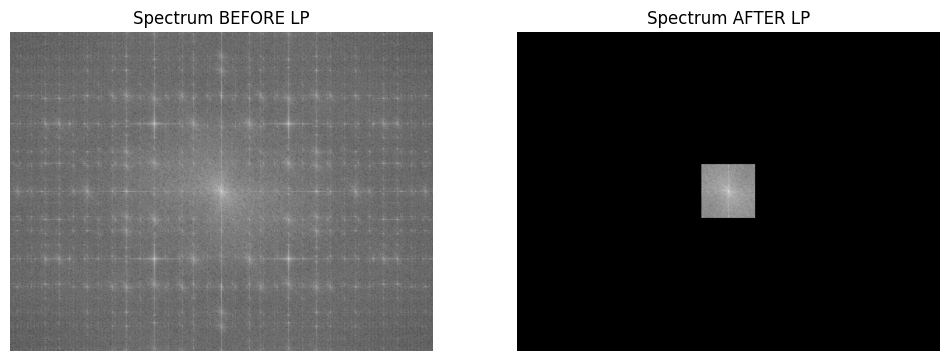

In [4]:
filtered_dft = dft_shift * mask

mag_after_lp = 20 * np.log(
    cv.magnitude(filtered_dft[:,:,0], filtered_dft[:,:,1]) + 1
)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(mag_before, cmap='gray')
plt.title('Spectrum BEFORE LP')
plt.axis('off')

plt.subplot(122)
plt.imshow(mag_after_lp, cmap='gray')
plt.title('Spectrum AFTER LP')
plt.axis('off')
plt.show()


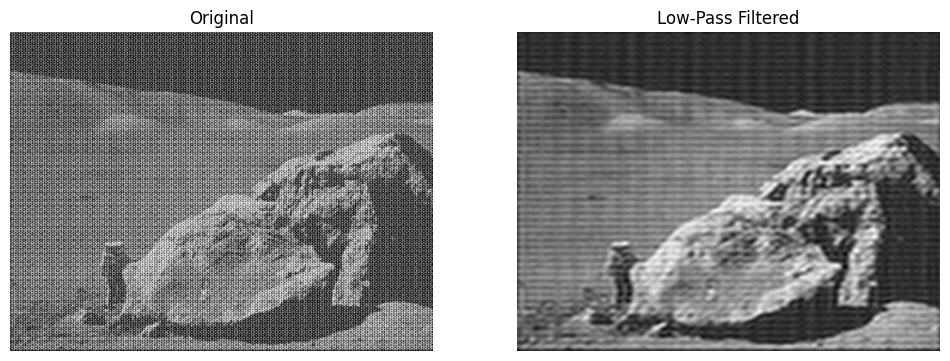

In [5]:
f_ishift = np.fft.ifftshift(filtered_dft)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('Low-Pass Filtered')
plt.axis('off')
plt.show()


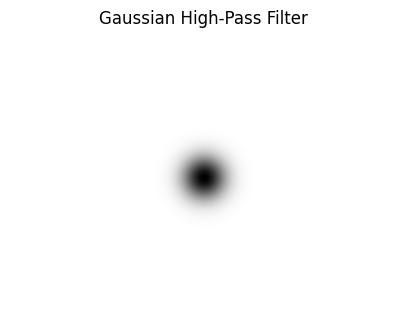

In [6]:
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
sigma = 30

gauss_lp = np.exp(-((x-cols/2)**2 + (y-rows/2)**2)/(2*sigma*sigma))
gauss_hp = 1 - gauss_lp

plt.figure(figsize=(5,5))
plt.imshow(gauss_hp, cmap='gray')
plt.title('Gaussian High-Pass Filter')
plt.axis('off')
plt.show()


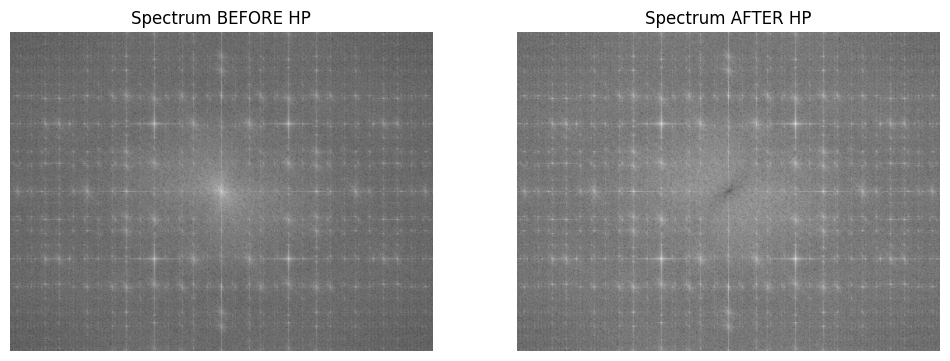

In [7]:
dft_hp = dft_shift * gauss_hp[:,:,None]

mag_after_hp = 20 * np.log(
    cv.magnitude(dft_hp[:,:,0], dft_hp[:,:,1]) + 1
)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(mag_before, cmap='gray')
plt.title('Spectrum BEFORE HP')
plt.axis('off')

plt.subplot(122)
plt.imshow(mag_after_hp, cmap='gray')
plt.title('Spectrum AFTER HP')
plt.axis('off')
plt.show()


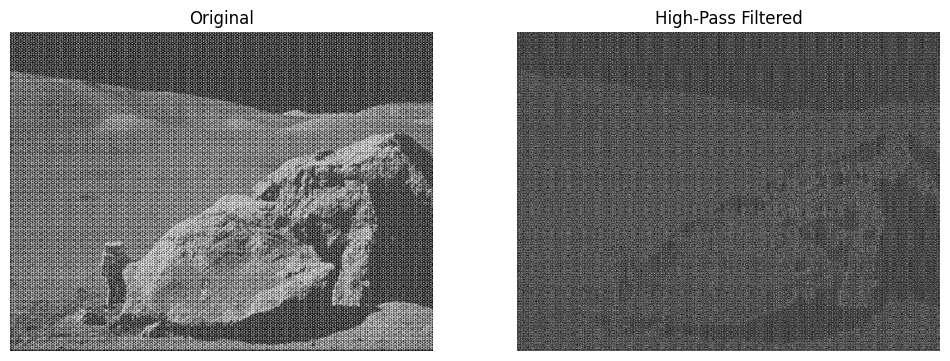

In [8]:
hp_ishift = np.fft.ifftshift(dft_hp)
hp_img = cv.idft(hp_ishift)
hp_img = cv.magnitude(hp_img[:,:,0], hp_img[:,:,1])

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(hp_img, cmap='gray')
plt.title('High-Pass Filtered')
plt.axis('off')
plt.show()


In [9]:
mask = np.ones((rows, cols, 2), np.float32)

peaks = [
    (cy - 83, cx - 107),
    (cy - 83, cx + 107),
    (cy + 83, cx - 107),
    (cy + 83, cx + 107)
]

for py, px in peaks:
    cv.circle(mask, (px, py), 13, (0, 0), -1)


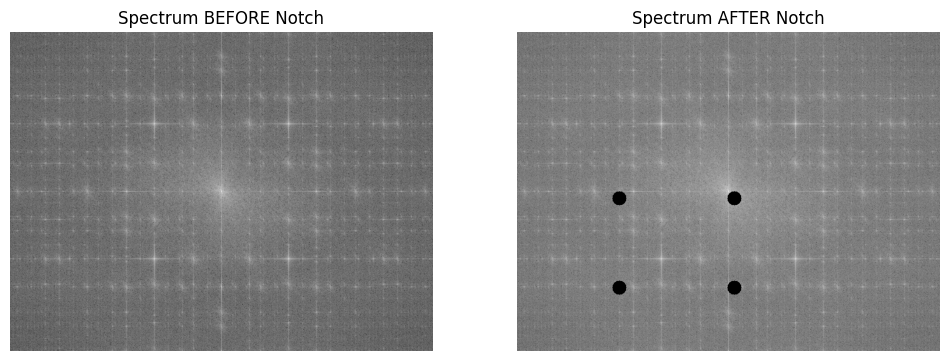

In [10]:
dft_notch = dft_shift * mask

mag_after_notch = 20 * np.log(
    cv.magnitude(dft_notch[:,:,0], dft_notch[:,:,1]) + 1
)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(mag_before, cmap='gray')
plt.title('Spectrum BEFORE Notch')
plt.axis('off')

plt.subplot(122)
plt.imshow(mag_after_notch, cmap='gray')
plt.title('Spectrum AFTER Notch')
plt.axis('off')
plt.show()


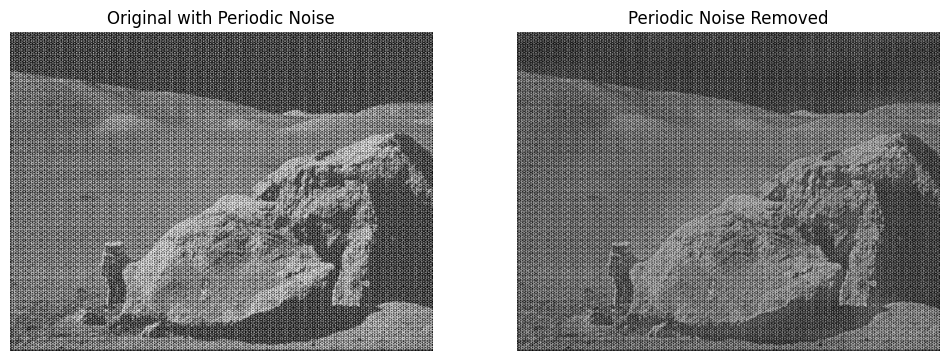

In [11]:
f_ishift = np.fft.ifftshift(dft_notch)
img_clean = cv.idft(f_ishift)
img_clean = cv.magnitude(img_clean[:,:,0], img_clean[:,:,1])

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original with Periodic Noise')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_clean, cmap='gray')
plt.title('Periodic Noise Removed')
plt.axis('off')
plt.show()
